In [3]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib_venn import venn2
from sklearn import datasets

from tqdm import tqdm

from adjustText import adjust_text

from packages.utils import standard_OHE

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [4]:
# Importazione dataset

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
for i in list(data.columns):
    print(i)




Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

In [6]:
#Modifica nome delle colonne
data.rename(columns={"Bankrupt?" : "Bancarotta",
                     " ROA(C) before interest and depreciation before interest" : "ROA(C) prima degli interessi e della svalutazione",
                     " ROA(A) before interest and % after tax" :"ROA(A) prima degli interessi e dopo le tasse",
                     " ROA(B) before interest and depreciation after tax" : "ROA(B) al lordo di interessi e ammortamenti dopo le imposte"," Operating Gross Margin" : "Margine Lordo Operativo"," Realized Sales Gross Margin" : "Margine Lordo sulle Vendite Effettive"," Operating Profit Rate" : "Margine di Profitto Operativo"," Pre-tax net Interest Rate" : "Aliquota di interesse netta ante imposte"," After-tax net Interest Rate" : "Tasso di interesse netto dopo le tasse"," Non-industry income and expenditure/revenue" : "Entrate e spese/redditività non legate all'industria"," Continuous interest rate (after tax)" : "Tasso di interesse continuo (al netto delle imposte)"," Operating Expense Rate" : "Tasso di Spesa Operativa", " Research and development expense rate" : "Aliquota delle spese di ricerca e sviluppo", " Cash flow rate" : "Tasso di flusso di cassa", " Interest-bearing debt interest rate" : "Aliquota degli interessi sul debito", " Tax rate (A)" : "Aliquota fiscale (A)", " Net Value Per Share (B)" : "Valore Netto per Azione (B)", " Net Value Per Share (A)" : "Valore Netto per Azione (A)", " Net Value Per Share (C)" : "Valore Netto per Azione (C)", " Persistent EPS in the Last Four Seasons" : "EPS persistente nelle ultime quattro stagioni", " Cash Flow Per Share" : "Flusso di cassa per azione", " Revenue Per Share (Yuan ¥)" : "Entrate per azione (Yuan ¥)", " Operating Profit Per Share (Yuan ¥)" : "Profitto Operativo per Azione (Yuan ¥)"," Per Share Net profit before tax (Yuan ¥)" : "Profitto netto per azione prima delle tasse (Yuan ¥)", " Realized Sales Gross Profit Growth Rate" : "Tasso di crescita del margine lordo delle vendite", " Operating Profit Growth Rate" : "Tasso di crescita dell'utile operativo", " After-tax Net Profit Growth Rate" : "Tasso di crescita del profitto netto dopo le tasse", " Regular Net Profit Growth Rate" : "Aliquota crescita regolare del profitto netto", " Continuous Net Profit Growth Rate" : "Tasso di crescita continua del profitto netto", " Total Asset Growth Rate" : "Tasso di crescita totale degli asset", " Net Value Growth Rate" : "Tasso crescita valore netto"," Total Asset Return Growth Rate Ratio" : "Tasso di crescita del rendimento totale degli asset "," Cash Reinvestment %" : "Percentuale di reinvestimento del contante", " Current Ratio" : "Rapporto Corrente", " Quick Ratio" : "Rapporto Rapido", " Interest Expense Ratio" : "Rapporto Spese Interesse", " Total debt/Total net worth" : "Debito totale/ Patrimonio netto totale", " Debt ratio %" : "Rapporto debito %", " Net worth/Assets" : "Patrimonio netto/Attività", " Long-term fund suitability ratio (A)" : "Livello di idoneità dei fondi a lungo termine (A)", " Borrowing dependency" : "Indebitamento da prestiti", " Contingent liabilities/Net worth" : "Crediti in sospeso/Patrimonio netto", " Operating profit/Paid-in capital" : "Profitto operativo su capitale versato", " Net profit before tax/Paid-in capital" : "Profitto netto prima delle imposte / Capitale sociale versato", " Inventory and accounts receivable/Net value" : "Inventario e crediti commerciali/Valore netto", " Total Asset Turnover" : "Rotazione totale degli asset", " Accounts Receivable Turnover" : "Rotazione dei crediti", " Average Collection Days" : "Giorni medi di incasso", " Inventory Turnover Rate (times)" : "Rotazione dell'inventario (volte)", " Fixed Assets Turnover Frequency" : "Frequenza del turnover degli asset fissi", " Net Worth Turnover Rate (times)" :  "Net Worth Turnover Rate (times)", " Revenue per person" : "Entrate per persona", " Operating profit per person" : "Profitto operativo per persona", " Allocation rate per person" : "Tariffa di allocazione per persona", " Working Capital to Total Assets" : "Capitale circolante su attivo totale", " Quick Assets/Total Assets" : "Attività rapide/Attività totali", " Current Assets/Total Assets" : "Attività correnti/Attività totali", " Cash/Total Assets" : "Cassa/Attività Totali", " Quick Assets/Current Liability" : "Attività rapide su passività corrente", " Cash/Current Liability" : "Cassa/Passività correnti", " Current Liability to Assets" : "Passività correnti su attività", " Operating Funds to Liability" : "Rapporto tra Fondi Operativi e Passività", " Inventory/Working Capital" : "Inventario/Capitale circolante", " Inventory/Current Liability" : "Inventario/Passività corrente", " Current Liabilities/Liability" : "Correnti Passività/Passivo", " Working Capital/Equity" : "Capitale circolante/patrimonio netto", " Current Liabilities/Equity" : "Passività correnti su patrimonio netto", " Long-term Liability to Current Assets" : "Debito a lungo termine su attività correnti", " Retained Earnings to Total Assets" : "Riserve utili su attivo totale", " Total income/Total expense" : "Reddito totale/Spese totali", " Total expense/Assets" : "Spese totali/Attività", " Current Asset Turnover Rate" : "Indice di Rotazione dell'Attivo Corrente", " Quick Asset Turnover Rate" : "Velocità di rotazione rapida degli asset", " Working capitcal Turnover Rate" : "Rapporto di rotazione del capitale circolante", " Cash Turnover Rate" : "Velocità di Rotazione del Contante", " Cash Flow to Sales" : "Flusso di cassa su vendite", " Fixed Assets to Assets" : "Attivi fissi su attivi", " Current Liability to Liability" : "Rapporto attuale di passività", " Current Liability to Equity" : "Passività corrente su patrimonio netto", " Equity to Long-term Liability" : "Rap. Patrimonio a Passività a Lungo Term.", " Cash Flow to Total Assets" : "Cash Flow su Attività Totali"," Cash Flow to Liability" : "Flusso di cassa sulle passività", " CFO to Assets" : "Rapporto CFO su Attività", " Cash Flow to Equity" : "Flusso di cassa verso il patrimonio netto", " Current Liability to Current Assets" : "Rapporto Passività Correnti su Attività Correnti", " Liability-Assets Flag" : "Indicatore Passività-Attività", " Net Income to Total Assets" : "Redditività sull'Attivo Totale (NITA)", " Total assets to GNP price" : "Totale attività rispetto al prezzo PNL", " No-credit Interval" : "Intervallo senza credito", " Gross Profit to Sales" : "Utile lordo sulle vendite"," Net Income to Stockholder's Equity" : "Utile netto/patrimonio netto", " Liability to Equity" : "Responsabilità verso il patrimonio netto", " Degree of Financial Leverage (DFL)" : "Grado di leva finanziaria (DFL)", " Interest Coverage Ratio (Interest expense to EBIT)" : "Rapp. di copertura degli interessi (interessi passivi/EBIT)", " Net Income Flag" : "Indicatore di Reddito Netto", " Equity to Liability" : "Capitale proprio/Passività"}, inplace = True)


In [7]:
for i in list(data.columns):
    print(i)


Bancarotta
ROA(C) prima degli interessi e della svalutazione
ROA(A) prima degli interessi e dopo le tasse
ROA(B) al lordo di interessi e ammortamenti dopo le imposte
Margine Lordo Operativo
Margine Lordo sulle Vendite Effettive
Margine di Profitto Operativo
Aliquota di interesse netta ante imposte
Tasso di interesse netto dopo le tasse
Entrate e spese/redditività non legate all'industria
Tasso di interesse continuo (al netto delle imposte)
Tasso di Spesa Operativa
Aliquota delle spese di ricerca e sviluppo
Tasso di flusso di cassa
Aliquota degli interessi sul debito
Aliquota fiscale (A)
Valore Netto per Azione (B)
Valore Netto per Azione (A)
Valore Netto per Azione (C)
EPS persistente nelle ultime quattro stagioni
Flusso di cassa per azione
Entrate per azione (Yuan ¥)
Profitto Operativo per Azione (Yuan ¥)
Profitto netto per azione prima delle tasse (Yuan ¥)
Tasso di crescita del margine lordo delle vendite
Tasso di crescita dell'utile operativo
Tasso di crescita del profitto netto dop

In [8]:
manual_selected_features = [
    
    'ROA(B) al lordo di interessi e ammortamenti dopo le imposte',
    'Margine Lordo Operativo',
    'Tasso di interesse netto dopo le tasse',
    'Tasso di Spesa Operativa',
    'Aliquota delle spese di ricerca e sviluppo',
    'Tasso di flusso di cassa',
    'Aliquota degli interessi sul debito',
    'Aliquota fiscale (A)',
    'Valore Netto per Azione (A)',
    'EPS persistente nelle ultime quattro stagioni',
    'Flusso di cassa per azione',
    "Tasso di crescita dell'utile operativo",
    "Tasso crescita valore netto",
    "Percentuale di reinvestimento del contante",
    "Debito totale/ Patrimonio netto totale",
    "Rapporto debito %",
    "Patrimonio netto/Attività",
    "Livello di idoneità dei fondi a lungo termine (A)",
    "Indebitamento da prestiti",
    "Crediti in sospeso/Patrimonio netto",
    "Profitto operativo su capitale versato",
    "Inventario e crediti commerciali/Valore netto",
    "Rotazione totale degli asset",
    "Profitto operativo per persona",
    "Passività correnti su attività",
    "Correnti Passività/Passivo",
    "Capitale circolante/patrimonio netto",
    "Debito a lungo termine su attività correnti",
    "Riserve utili su attivo totale",
    "Indice di Rotazione dell'Attivo Corrente",
    "Passività corrente su patrimonio netto",
    "Redditività sull'Attivo Totale (NITA)",
    "Grado di leva finanziaria (DFL)",
    "Capitale proprio/Passività",
    'Bancarotta'
]


In [9]:
# Dimensione dataset
df = pd.DataFrame(data[manual_selected_features])
print("La dimensione del dataset è: ", df.shape)


La dimensione del dataset è:  (6819, 35)


In [10]:
# Valori Mancanti
missing_values_count = df.isnull().sum()
print(missing_values_count)


ROA(B) al lordo di interessi e ammortamenti dopo le imposte    0
Margine Lordo Operativo                                        0
Tasso di interesse netto dopo le tasse                         0
Tasso di Spesa Operativa                                       0
Aliquota delle spese di ricerca e sviluppo                     0
Tasso di flusso di cassa                                       0
Aliquota degli interessi sul debito                            0
Aliquota fiscale (A)                                           0
Valore Netto per Azione (A)                                    0
EPS persistente nelle ultime quattro stagioni                  0
Flusso di cassa per azione                                     0
Tasso di crescita dell'utile operativo                         0
Tasso crescita valore netto                                    0
Percentuale di reinvestimento del contante                     0
Debito totale/ Patrimonio netto totale                         0
Rapporto debito %        

In [11]:
# Valori Duplicati
Duplicates = df.duplicated().sum()
print("Numero di duplicati: ", Duplicates)


Numero di duplicati:  0


In [12]:
# Tipologia dati
print(df.dtypes)


ROA(B) al lordo di interessi e ammortamenti dopo le imposte    float64
Margine Lordo Operativo                                        float64
Tasso di interesse netto dopo le tasse                         float64
Tasso di Spesa Operativa                                       float64
Aliquota delle spese di ricerca e sviluppo                     float64
Tasso di flusso di cassa                                       float64
Aliquota degli interessi sul debito                            float64
Aliquota fiscale (A)                                           float64
Valore Netto per Azione (A)                                    float64
EPS persistente nelle ultime quattro stagioni                  float64
Flusso di cassa per azione                                     float64
Tasso di crescita dell'utile operativo                         float64
Tasso crescita valore netto                                    float64
Percentuale di reinvestimento del contante                     float64
Debito

In [13]:
# variabili dummy
dummy_cols = data.columns[data.nunique() == 2]
data_dummy = data[dummy_cols]
print(data_dummy)


      Bancarotta  Indicatore Passività-Attività
0              1                              0
1              1                              0
2              1                              0
3              1                              0
4              1                              0
...          ...                            ...
6814           0                              0
6815           0                              0
6816           0                              0
6817           0                              0
6818           0                              0

[6819 rows x 2 columns]


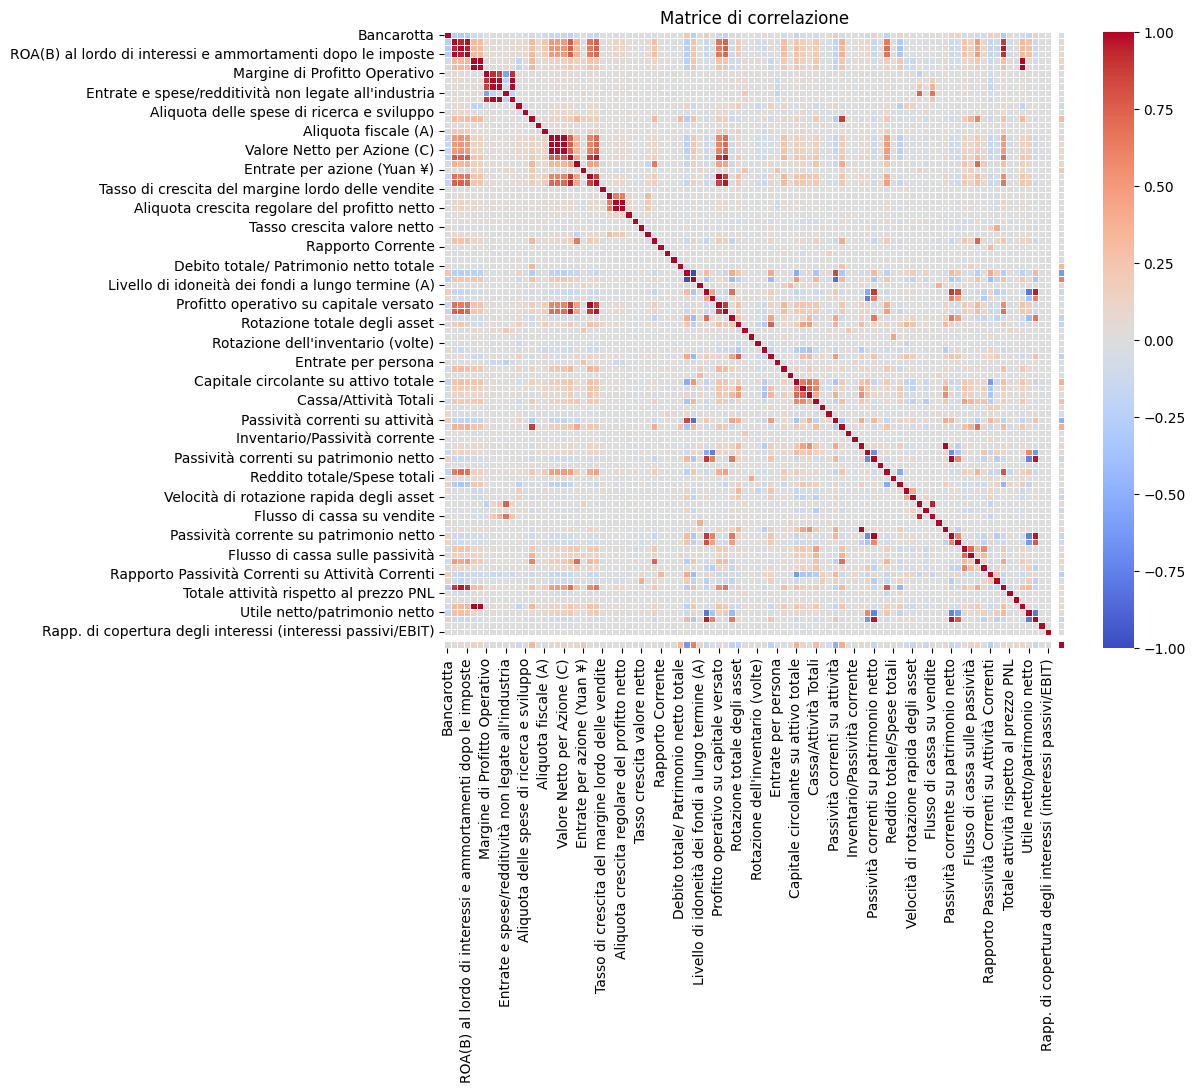

In [14]:
# Matrice di Correlazione
correlation_matrix = data.corr()
correlation_matrix

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()


In [15]:
x = data.drop(['Bancarotta'],axis=1)
y = data['Bancarotta']

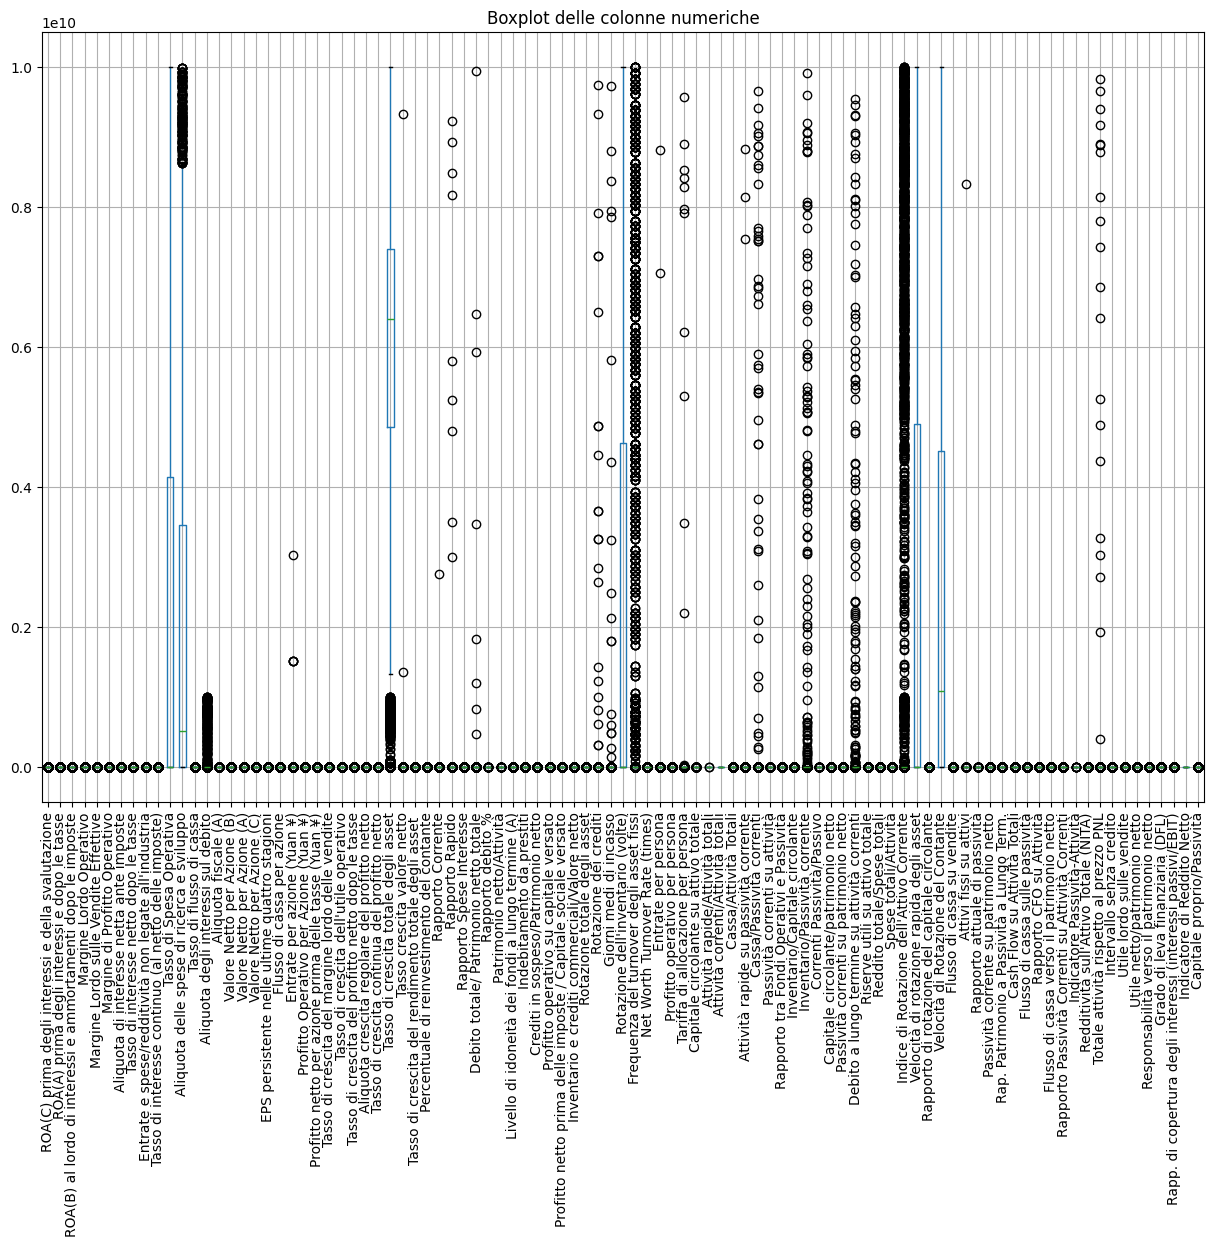

In [16]:
# Boxplot
plt.figure(figsize=(15, 10))
x.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [17]:
df[df['Bancarotta'] == 1].shape

(220, 35)

In [18]:
df_zeros = df[df['Bancarotta'] == 0]
df_ones = df[df['Bancarotta'] == 1]
n_desired_ones = 450
df_zeros = df_zeros.sample(n_desired_ones, random_state=42)
df_unbalanced = pd.concat([df_zeros, df_ones])
df_unbalanced

,ROA(B) al lordo di interessi e ammortamenti dopo le imposte,Margine Lordo Operativo,Tasso di interesse netto dopo le tasse,Tasso di Spesa Operativa,Aliquota delle spese di ricerca e sviluppo,Tasso di flusso di cassa,Aliquota degli interessi sul debito,Aliquota fiscale (A),Valore Netto per Azione (A),EPS persistente nelle ultime quattro stagioni,...,Correnti Passività/Passivo,Capitale circolante/patrimonio netto,Debito a lungo termine su attività correnti,Riserve utili su attivo totale,Indice di Rotazione dell'Attivo Corrente,Passività corrente su patrimonio netto,Redditività sull'Attivo Totale (NITA),Grado di leva finanziaria (DFL),Capitale proprio/Passività,Bancarotta
2236,0.524,0.608,0.809,0.000,0.000,0.461,0.000,0.135,0.175,0.218,...,0.994,0.740,0.000,0.937,0.001,0.335,0.801,0.027,0.024,0
5538,0.559,0.612,0.809,0.000,4640000000.000,0.473,0.000,0.193,0.209,0.229,...,0.319,0.735,0.021,0.936,0.000,0.327,0.809,0.027,0.043,0
4593,0.557,0.606,0.809,0.000,543000000.000,0.467,0.000,0.150,0.171,0.219,...,0.804,0.737,0.002,0.935,0.000,0.328,0.807,0.027,0.057,0
6315,0.503,0.598,0.809,7420000000.000,1340000000.000,0.461,0.000,0.000,0.159,0.207,...,0.827,0.728,0.006,0.923,797000000.000,0.336,0.772,0.027,0.020,0
4205,0.596,0.614,0.809,0.000,5450000000.000,0.468,0.000,0.000,0.185,0.246,...,0.782,0.741,0.003,0.945,0.000,0.331,0.837,0.027,0.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,0.461,0.613,0.809,0.000,0.000,0.460,0.001,0.000,0.139,0.198,...,0.939,0.734,0.000,0.874,0.000,0.347,0.726,0.027,0.016,1
6640,0.221,0.598,0.808,0.000,1880000000.000,0.473,0.000,0.000,0.070,0.080,...,0.295,0.733,0.038,0.778,0.000,0.320,0.519,0.027,0.004,1
6641,0.378,0.591,0.809,5530000000.000,0.000,0.465,0.000,0.000,0.131,0.165,...,0.858,0.728,0.005,0.853,7290000000.000,0.391,0.558,0.027,0.012,1
6642,0.380,0.581,0.808,0.000,0.000,0.458,0.000,0.000,0.132,0.154,...,0.596,0.719,0.025,0.879,0.000,0.372,0.642,0.027,0.012,1


In [19]:
for i in df_unbalanced.columns:
    print(i)

ROA(B) al lordo di interessi e ammortamenti dopo le imposte
Margine Lordo Operativo
Tasso di interesse netto dopo le tasse
Tasso di Spesa Operativa
Aliquota delle spese di ricerca e sviluppo
Tasso di flusso di cassa
Aliquota degli interessi sul debito
Aliquota fiscale (A)
Valore Netto per Azione (A)
EPS persistente nelle ultime quattro stagioni
Flusso di cassa per azione
Tasso di crescita dell'utile operativo
Tasso crescita valore netto
Percentuale di reinvestimento del contante
Debito totale/ Patrimonio netto totale
Rapporto debito %
Patrimonio netto/Attività
Livello di idoneità dei fondi a lungo termine (A)
Indebitamento da prestiti
Crediti in sospeso/Patrimonio netto
Profitto operativo su capitale versato
Inventario e crediti commerciali/Valore netto
Rotazione totale degli asset
Profitto operativo per persona
Passività correnti su attività
Correnti Passività/Passivo
Capitale circolante/patrimonio netto
Debito a lungo termine su attività correnti
Riserve utili su attivo totale
Indice

In [20]:
df_unbalanced = standard_OHE(df_unbalanced, drop_first=True)
df_unbalanced.shape

(670, 35)

In [21]:
# Divisione Train e Test sets
x = df_unbalanced.drop(['Bancarotta'],axis=1)
y = df_unbalanced['Bancarotta']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


(536, 34)
(134, 34)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    """
    Calculate VIF
    """
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif

vif = calculate_vif(X_train)
print(vif)

                                             Variable        VIF
0                           Patrimonio netto/Attività 257969.865
1                                   Rapporto debito %   7799.665
2              Passività corrente su patrimonio netto     91.646
3                Capitale circolante/patrimonio netto     84.868
4                      Passività correnti su attività     32.875
5               Redditività sull'Attivo Totale (NITA)     20.224
6       Inventario e crediti commerciali/Valore netto     17.058
7                           Indebitamento da prestiti     16.911
8   ROA(B) al lordo di interessi e ammortamenti do...     15.158
9       EPS persistente nelle ultime quattro stagioni     13.386
10                Crediti in sospeso/Patrimonio netto     13.158
11             Debito totale/ Patrimonio netto totale      8.956
12                         Correnti Passività/Passivo      7.601
13                     Riserve utili su attivo totale      6.212
14             Profitto o

In [23]:
# Count features with high VIF
vif_threshold = 5
features_to_remove = vif[vif['VIF'] > vif_threshold]['Variable']

# Remove features with VIF > 5
X_train_uncorr = X_train.drop(columns=features_to_remove)

vif = calculate_vif(X_train_uncorr)
print(vif)
print("Features removed:", features_to_remove.shape[0])
print("Remaining features:", X_train_uncorr.shape[1])


                                             Variable       VIF
0              Tasso di interesse netto dopo le tasse 27768.982
1              Tasso di crescita dell'utile operativo 27641.255
2                             Margine Lordo Operativo  2505.076
3                            Tasso di flusso di cassa  1159.951
4                          Flusso di cassa per azione   845.942
5                      Profitto operativo per persona   299.611
6          Percentuale di reinvestimento del contante    97.117
7                         Valore Netto per Azione (A)    59.332
8                        Rotazione totale degli asset     3.578
9                          Capitale proprio/Passività     2.901
10                    Grado di leva finanziaria (DFL)     2.346
11  Livello di idoneità dei fondi a lungo termine (A)     1.692
12         Aliquota delle spese di ricerca e sviluppo     1.602
13                           Tasso di Spesa Operativa     1.582
14                               Aliquot

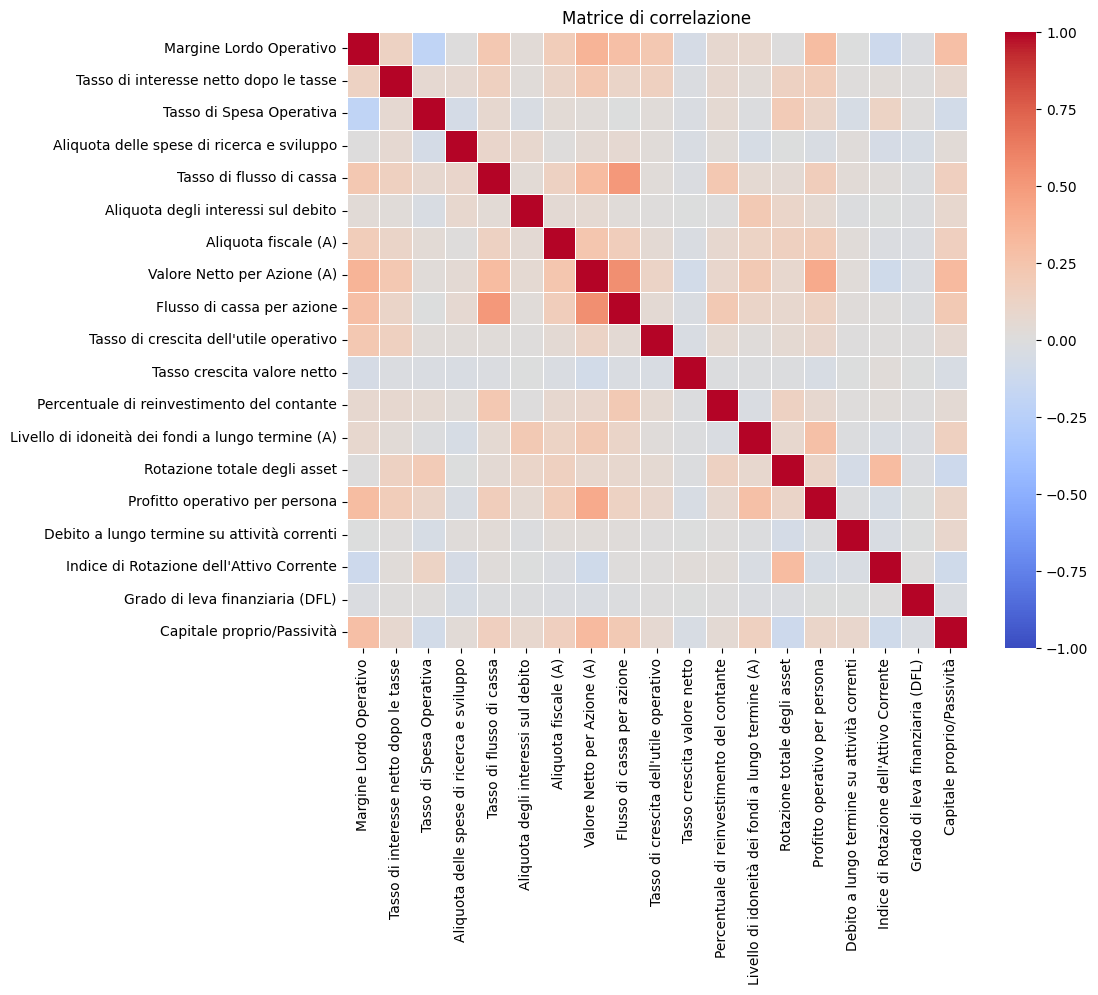

In [24]:
correlation_matrix = X_train_uncorr.corr()

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()

In [25]:
def balance_with_SMOTE(x_train, y_train):
    """
    Balances the dataset using the Synthetic Minority Over-sampling Technique (SMOTE).
    """
    smote = SMOTE()
    x_train, y_train = smote.fit_resample(x_train, y_train)
    return x_train, y_train

vals_before_smote = y_train.value_counts()
vals_before_smote


Bancarotta
0    359
1    177
Name: count, dtype: int64

In [26]:
# sovradimensionamento del dataset
X_train_SMOTE, y_train_SMOTE = balance_with_SMOTE(x_train=X_train_uncorr, y_train=y_train)

In [27]:
vals_after_smote = y_train_SMOTE.value_counts()
vals_after_smote

Bancarotta
0    359
1    359
Name: count, dtype: int64

In [28]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_SMOTE, y_train_SMOTE)
y_train_pred = model.predict(X_train_SMOTE)

# Calcola accuracy
accuracy = accuracy_score(y_train_pred, y_train_SMOTE)
print("Accuracy:", accuracy)

Accuracy: 0.5097493036211699


In [29]:
def rfe_selection(X, y, k):
    model = LogisticRegression(max_iter=10000)
    rfe = RFE(model, n_features_to_select=k)
    rfe = rfe.fit(X, y)
    selected_features = X.columns[rfe.get_support(indices=True)]
    return X[selected_features]

In [30]:
def skb_selection(X, y, k):
    skb = SelectKBest(score_func=f_classif, k = k)
    skb = skb.fit(X, y)
    selected_features = X.columns[skb.get_support(indices=True)]
    return X[selected_features]

In [31]:
# ciclo rfe
accuracies_rfe = []
rfe_selections = {}

for k in tqdm(range(1,len(X_train_SMOTE.columns)+1)):
    
    # selezioniamo le k variabili
    x_selected = rfe_selection(X=X_train_SMOTE, y=y_train_SMOTE, k=k)

    # Store the selected features
    rfe_selections[k] = x_selected.columns

    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(x_selected)

    # facciamo un fitting del modello
    model = sm.Logit(y_train_SMOTE.to_numpy(),X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)

    # trasformiamo le probanilità in valori binari 
    y_pred = (y_pred > 0.5).astype(int)

    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train_SMOTE, y_pred)
    print(f"Accuracy with {k} features: {accuracy}")

    # lo aggiungiamo alla lista 
    accuracies_rfe.append(accuracy)



 11%|█         | 2/19 [00:00<00:02,  6.97it/s]

Accuracy with 1 features: 0.5041782729805014
Accuracy with 2 features: 0.5125348189415042


 21%|██        | 4/19 [00:00<00:01,  7.80it/s]

Accuracy with 3 features: 0.5445682451253482
Accuracy with 4 features: 0.5431754874651811


 32%|███▏      | 6/19 [00:00<00:01,  8.20it/s]

Accuracy with 5 features: 0.5403899721448467
Accuracy with 6 features: 0.5376044568245125


 42%|████▏     | 8/19 [00:01<00:01,  8.36it/s]

Accuracy with 7 features: 0.7256267409470752
Accuracy with 8 features: 0.7311977715877437


 58%|█████▊    | 11/19 [00:01<00:00,  9.63it/s]

Accuracy with 9 features: 0.7520891364902507
Accuracy with 10 features: 0.8064066852367688
Accuracy with 11 features: 0.8091922005571031


 68%|██████▊   | 13/19 [00:01<00:00, 10.78it/s]

Accuracy with 12 features: 0.8676880222841226
Accuracy with 13 features: 0.8704735376044568
Accuracy with 14 features: 0.8662952646239555


100%|██████████| 19/19 [00:01<00:00, 10.94it/s]

Accuracy with 15 features: 0.8746518105849582
Accuracy with 16 features: 0.8704735376044568
Accuracy with 17 features: 0.871866295264624
Accuracy with 18 features: 0.871866295264624
Accuracy with 19 features: 0.8760445682451253


In [32]:
k_rfe = 13

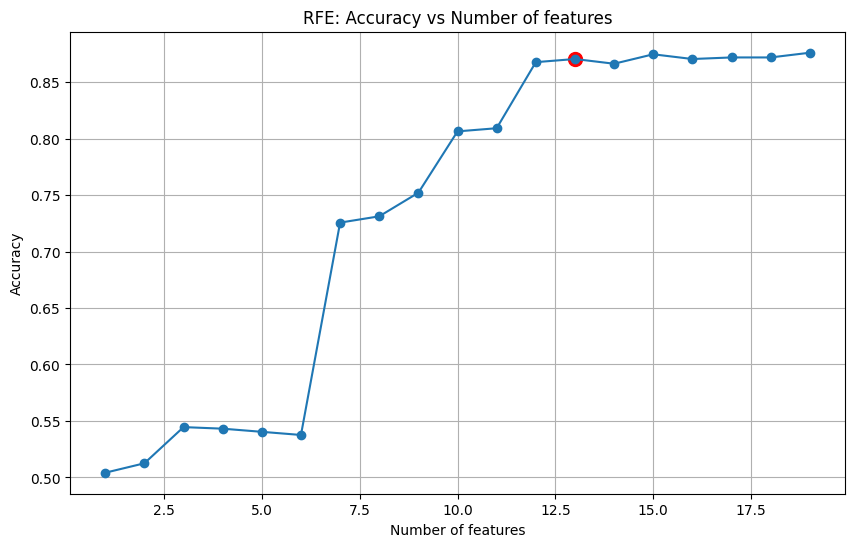

In [33]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_rfe, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('RFE: Accuracy vs Number of features')
plt.grid()
plt.show()


In [34]:
# ciclo skb
accuracies_skb = []
skb_selections = {}

for k in tqdm(range(1,len(X_train_SMOTE.columns)+1)):
    
    # selezioniamo le k variabili
    x_selected = skb_selection(X=X_train_SMOTE, y=y_train_SMOTE, k=k)

    # Store the selected features
    skb_selections[k] = x_selected.columns

    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(x_selected)

    try:

        # facciamo un fitting del modello
        model = sm.Logit(y_train_SMOTE.to_numpy(),X_train_w_intercept).fit(disp=False)

        # prevediamo le probabilità
        y_pred = model.predict(X_train_w_intercept)

        # trasformiamo le probanilità in valori binari 
        y_pred = (y_pred > 0.5).astype(int)

        # calcoliamo l'accuracy del modello
        accuracy = metrics.accuracy_score(y_train_SMOTE, y_pred)
    
    except:
        print("Model did not converge")
        
    # lo aggiungiamo alla lista 
    accuracies_skb.append(accuracy)



100%|██████████| 19/19 [00:00<00:00, 66.91it/s] 


In [35]:
k_skb = 7

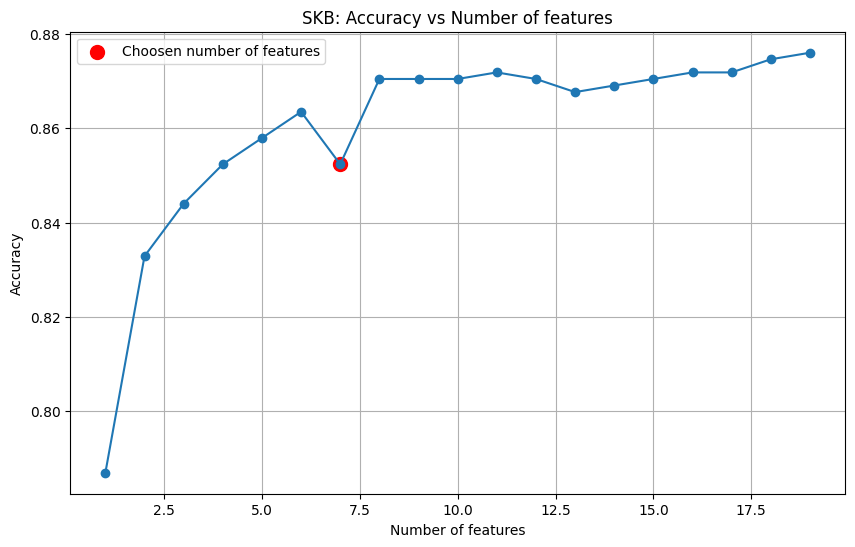

In [36]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_skb, marker='o' )
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('SKB: Accuracy vs Number of features')
plt.grid()
plt.show()


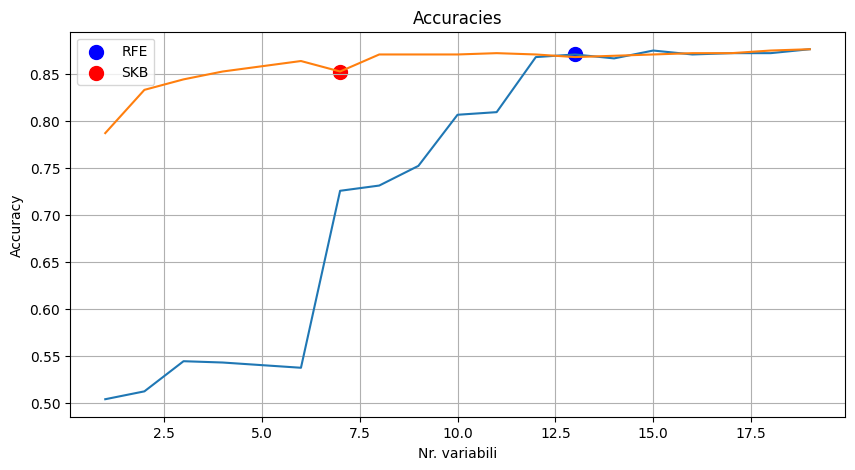

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_rfe)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_skb)
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='blue', label='RFE', s=100)
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='SKB', s=100)
plt.title('Accuracies') 
plt.xlabel('Nr. variabili')
plt.ylabel('Accuracy')
plt.grid()
plt.legend() 
plt.show()

In [38]:
# Select the best features for RFE and SKB
X_train_skb = X_train_SMOTE[skb_selections[k_skb]]
X_train_rfe = X_train_SMOTE[rfe_selections[k_rfe]]

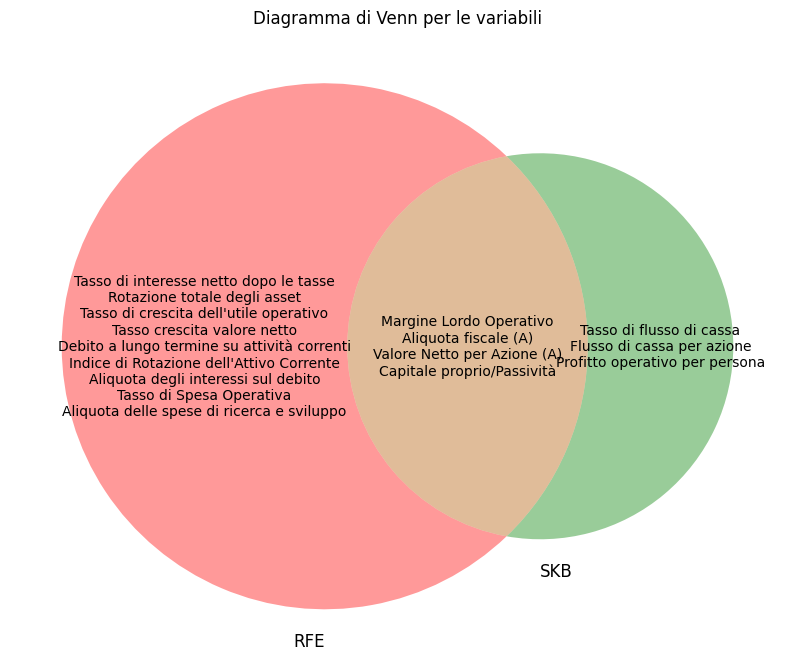

In [39]:
rfe_cols = list(X_train_rfe.columns)
skb_cols = list(X_train_skb.columns)

set1 = set(rfe_cols)
set2 = set(skb_cols)

# Crea il diagramma di Venn
plt.figure(figsize=(10, 10))
venn_diagram = venn2([set1, set2], ('RFE', 'SKB'))

# Assegna i nomi delle parole alle etichette nelle aree corrispondenti del diagramma di Venn
venn_diagram.get_label_by_id('10').set_text('\n'.join(set1 - set2))
venn_diagram.get_label_by_id('11').set_text('\n'.join(set1 & set2))
venn_diagram.get_label_by_id('01').set_text('\n'.join(set2 - set1))

# Mostra il grafico
plt.title("Diagramma di Venn per le variabili")
plt.show()

In [40]:
# LOOCV
def loocv(X, y):
    model = LogisticRegression(max_iter=100000, solver="newton-cholesky")
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
    return scores.mean()

In [41]:
# LOOCV rfe
accuracy_rfe = loocv(X_train_rfe, y_train_SMOTE)
print(f"Accuracy with RFE: {accuracy_rfe}")

# LOOCV skb
accuracy_skb = loocv(X_train_skb, y_train_SMOTE)
print(f"Accuracy with SKB: {accuracy_skb}")



Accuracy with RFE: 0.5027855153203342
Accuracy with SKB: 0.7646239554317549


In [42]:
x_selected = X_train[skb_selections[k_skb]]
X_train_w_intercept = sm.add_constant(x_selected)
skb_logistic_regression = sm.Logit(y_train.to_numpy(),X_train_w_intercept).fit(disp=False)

def predict_skb_logistic_regression(X, y):

    # Select the choosen features with SelectKBest
    x_selected = X[skb_selections[k_skb]]
    X_train_w_intercept = sm.add_constant(x_selected)

    # Predict probabilities
    y_pred = skb_logistic_regression.predict(X_train_w_intercept)

    # Transform probabilities to binary values
    y_pred = (y_pred > 0.5).astype(int)

    conf_matrix = confusion_matrix(y, y_pred)

    return y_pred, conf_matrix

y_pred, conf_matrix = predict_skb_logistic_regression(X_test, y_test)

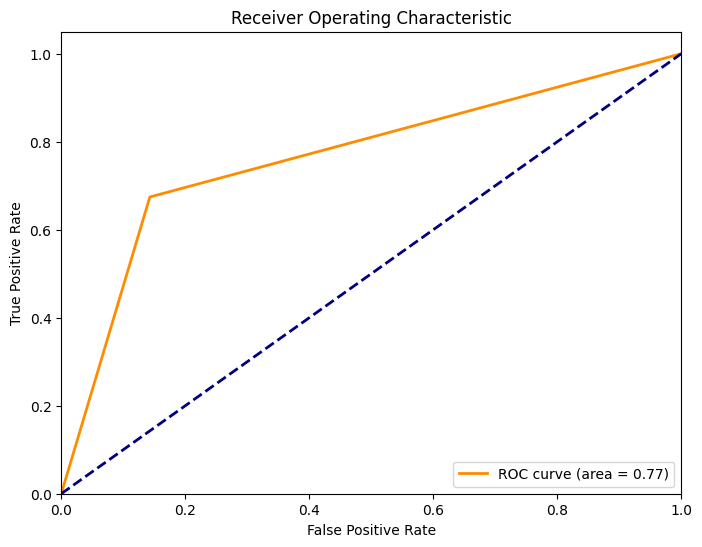

In [43]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [44]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)


# Calculate precision
precision = metrics.precision_score(y_test, y_pred)


# Calculate recall (sensitivity)
recall = metrics.recall_score(y_test, y_pred)


# Calculate specificity
specificity = conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[0,1])


# Calcultate FPR
fpr = 1 - specificity


# Calculate F1 score
f1_score = metrics.f1_score(y_test, y_pred)


# Print metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('FPR:', fpr)
print('F1 Score:', f1_score)

Accuracy: 0.7985074626865671
Precision: 0.6904761904761905
Recall: 0.6744186046511628
Specificity: 0.8571428571428571
FPR: 0.1428571428571429
F1 Score: 0.6823529411764706


In [45]:
# Calculate the Gini coefficient
gini = 2 * roc_auc - 1
print('Gini coefficient: %.2f' % gini)

Gini coefficient: 0.53


# PCA

## Standardizzazione

In [46]:
# select numerical columns
X_train_num = X_train_SMOTE.select_dtypes(include=[np.number])

# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

# Standardize the data
df_standardized = scaler.fit_transform(X_train_num)
df_standardized = pd.DataFrame(df_standardized, columns=X_train_num.columns)
df_standardized.head()

,Margine Lordo Operativo,Tasso di interesse netto dopo le tasse,Tasso di Spesa Operativa,Aliquota delle spese di ricerca e sviluppo,Tasso di flusso di cassa,Aliquota degli interessi sul debito,Aliquota fiscale (A),Valore Netto per Azione (A),Flusso di cassa per azione,Tasso di crescita dell'utile operativo,Tasso crescita valore netto,Percentuale di reinvestimento del contante,Livello di idoneità dei fondi a lungo termine (A),Rotazione totale degli asset,Profitto operativo per persona,Debito a lungo termine su attività correnti,Indice di Rotazione dell'Attivo Corrente,Grado di leva finanziaria (DFL),Capitale proprio/Passività
0,1.073,0.337,2.053,0.981,1.929,3.431,1.436,0.394,0.694,0.068,-0.060,0.105,-0.126,-0.563,0.904,-0.081,-0.436,-0.070,0.216
1,-0.363,-0.474,-0.614,-0.731,0.092,-0.132,-0.559,-1.637,0.227,-0.185,-0.060,0.303,-0.229,-0.394,-0.553,-0.081,1.678,-0.072,-0.783
2,0.078,-0.006,-0.614,-0.731,-0.031,-0.132,-0.559,-0.609,0.113,0.075,-0.060,0.144,-0.157,-0.919,-0.254,-0.081,-0.436,-0.097,-0.545
3,1.034,0.327,-0.614,-0.731,0.067,-0.132,1.302,0.757,0.231,0.089,-0.060,0.021,-0.137,0.908,0.205,-0.081,-0.436,-0.070,0.017
4,-0.834,0.221,0.391,-0.238,0.185,-0.132,-0.559,-0.711,0.326,0.097,-0.060,0.252,-0.217,-0.631,-0.104,-0.081,-0.436,-0.040,-0.393


In [47]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)

# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)

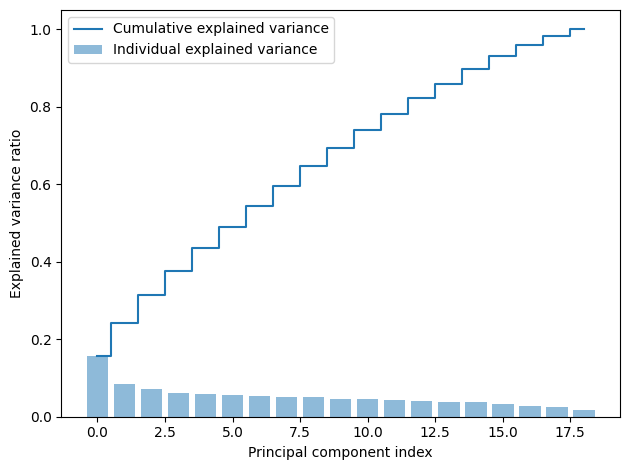

In [48]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [49]:
# Find index where cumulative explained variance is greater than a threshold
desidered_explained_variance = 0.75
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Number of components explaining {desidered_explained_variance}% of variance: {index_selected}')

Number of components explaining 0.75% of variance: 12


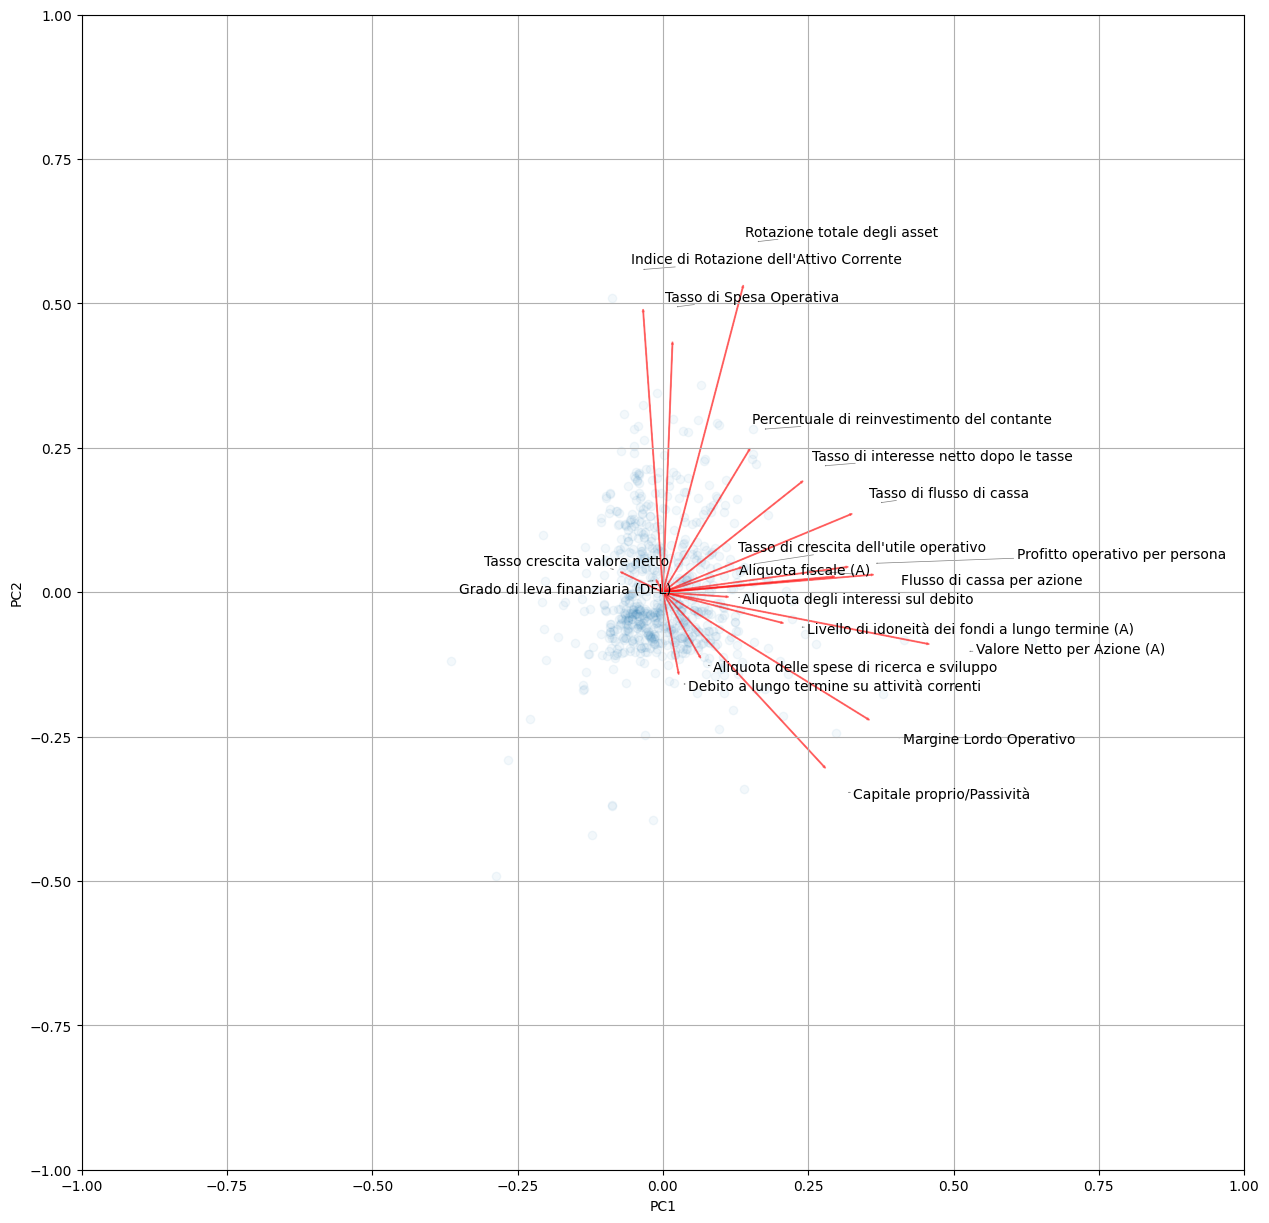

In [50]:
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(15, 15))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.05)

    texts = []
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        text = plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')
        texts.append(text)

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

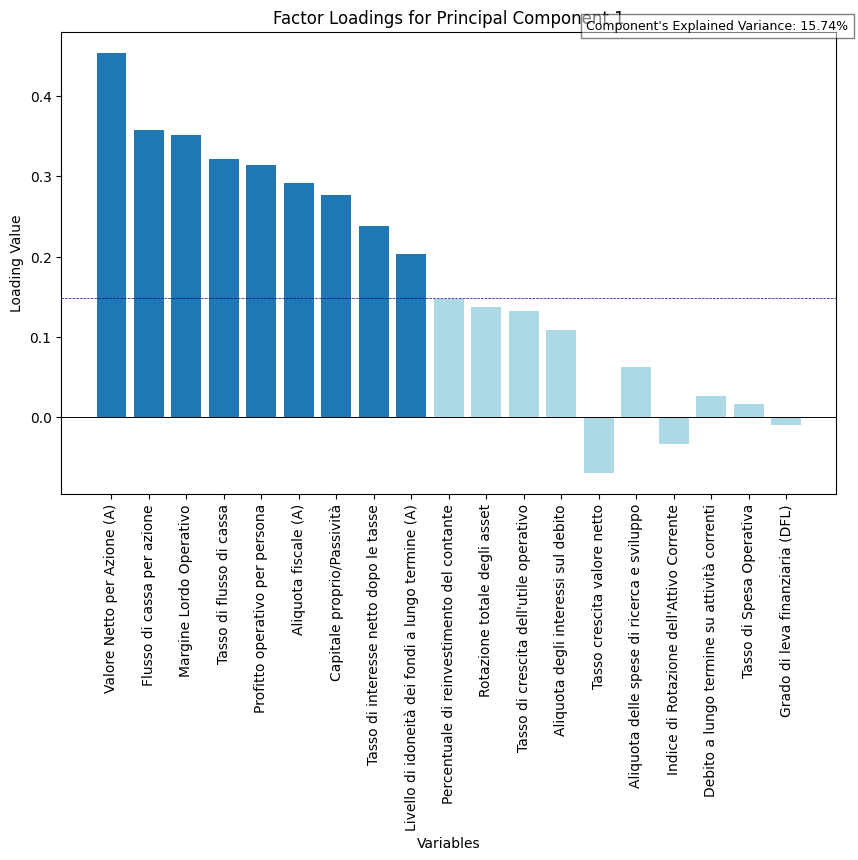

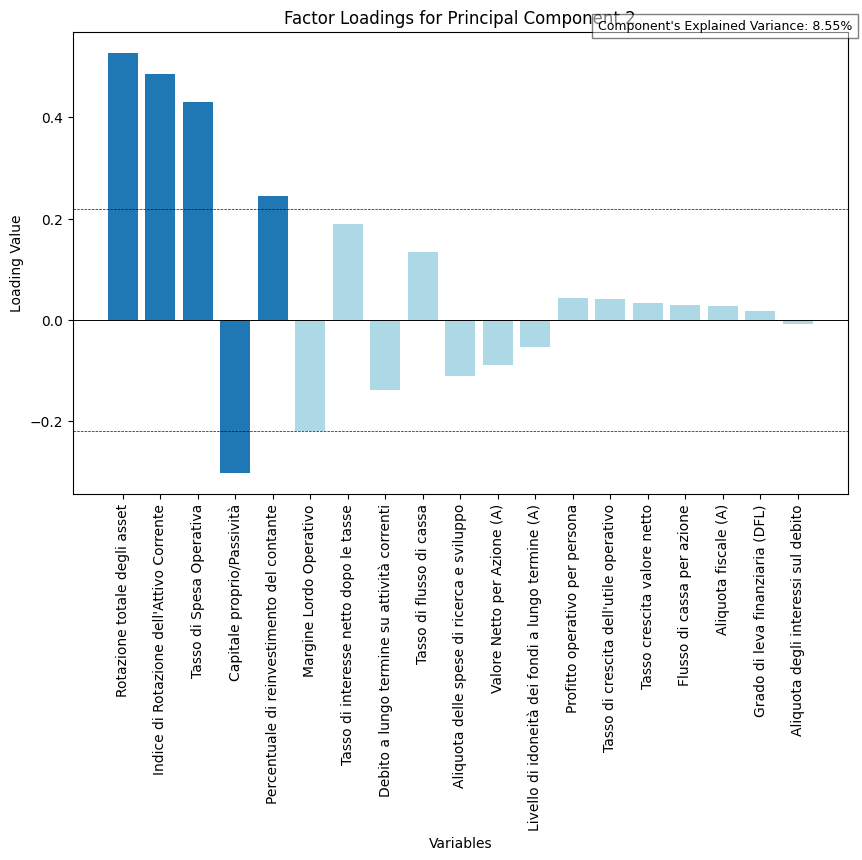

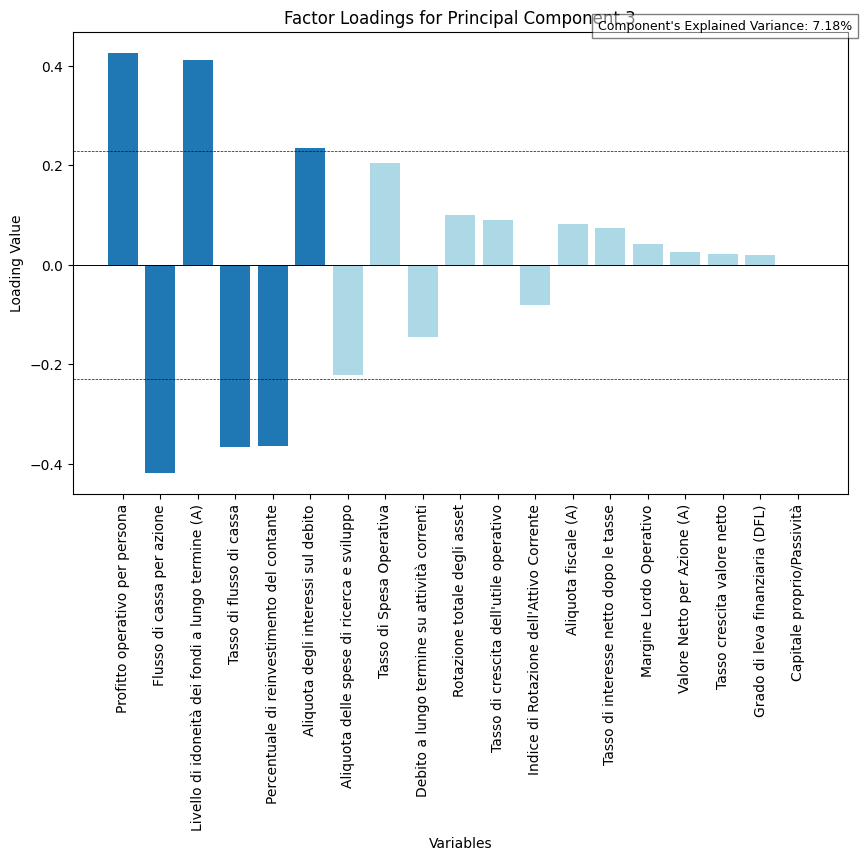

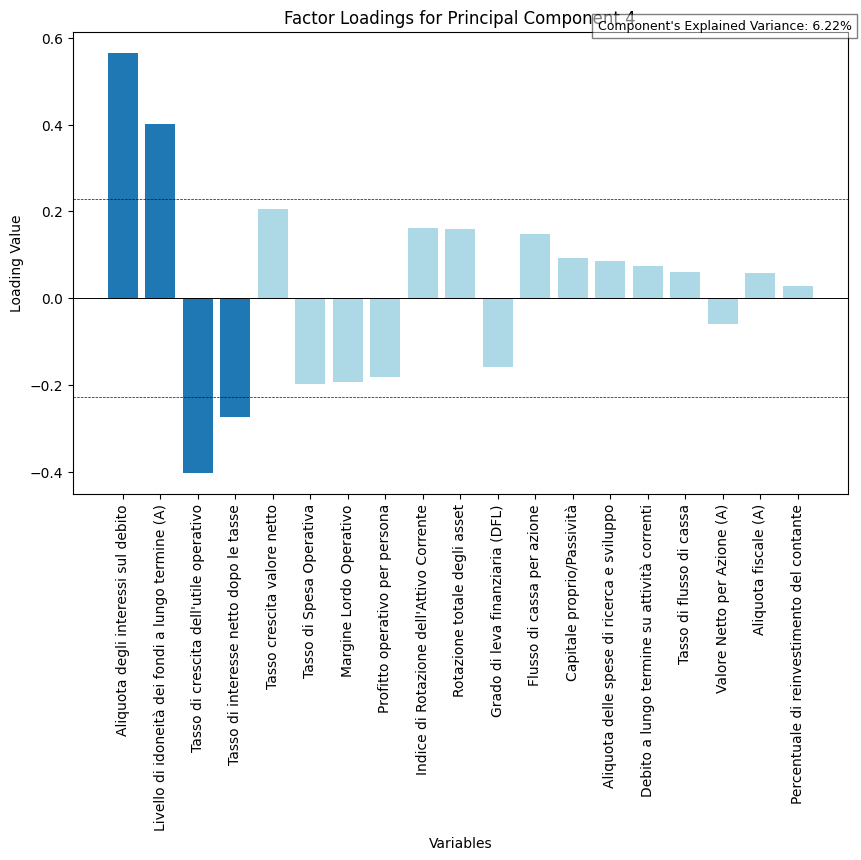

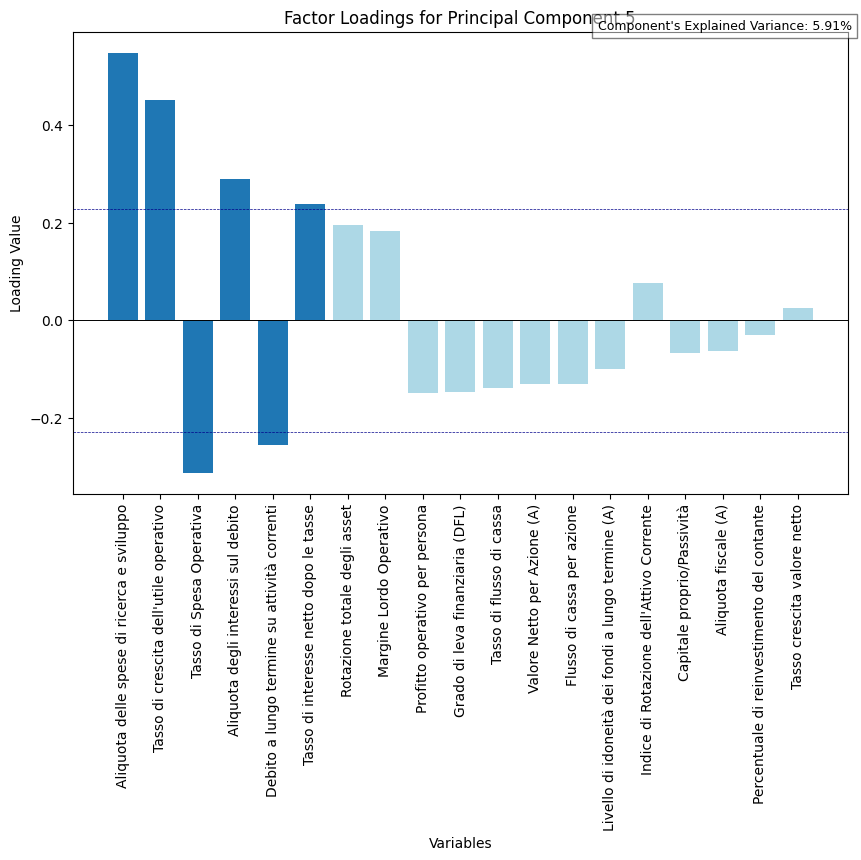

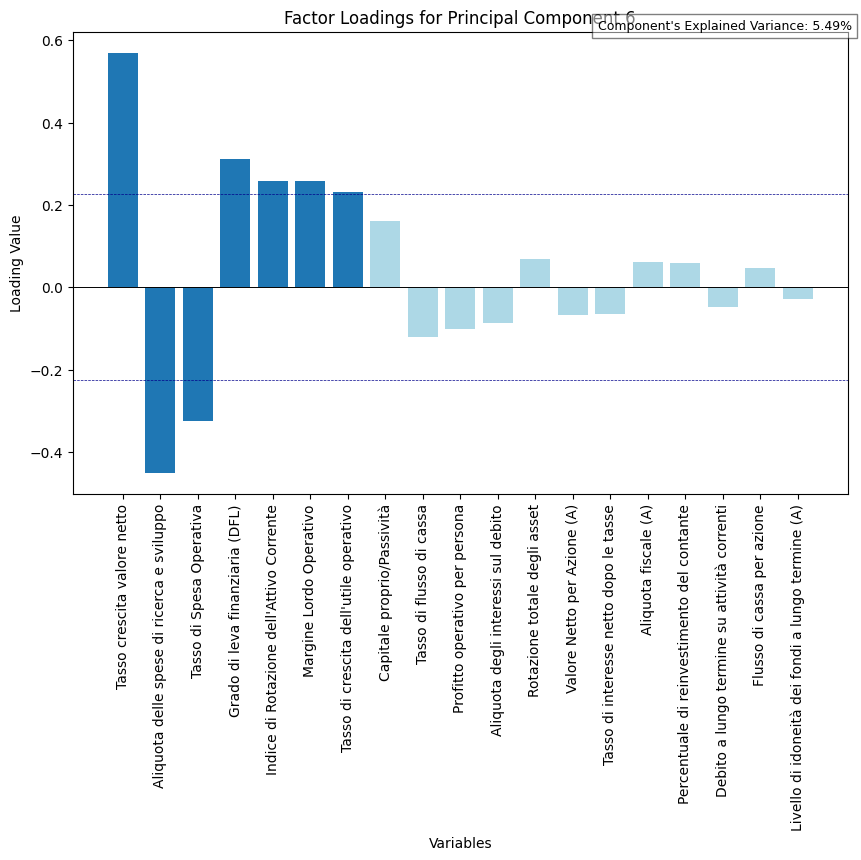

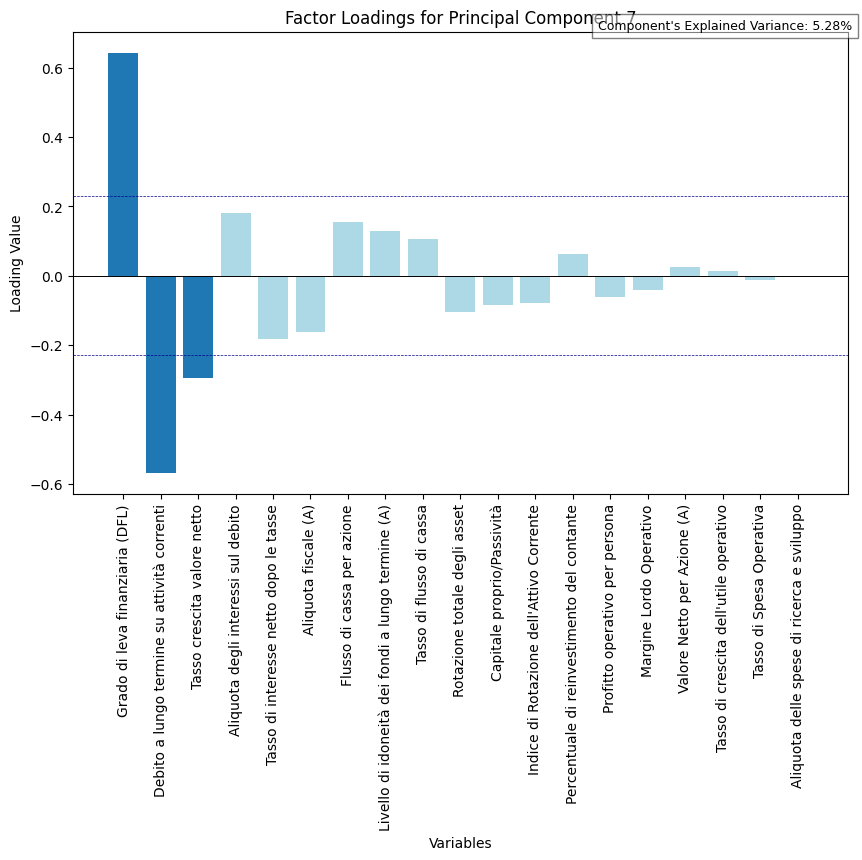

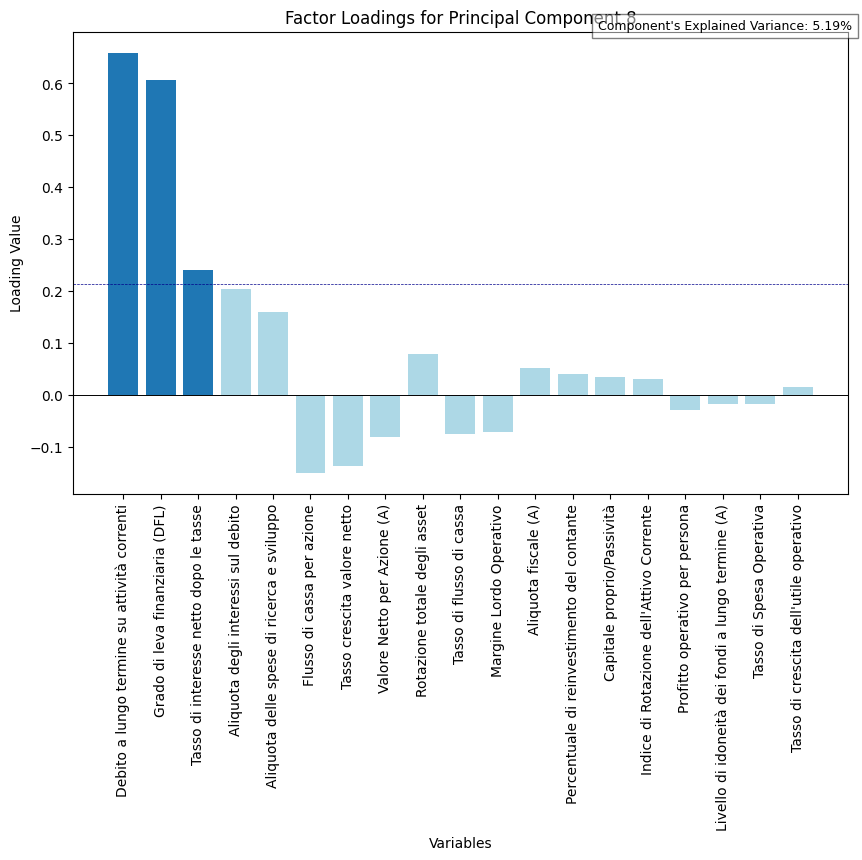

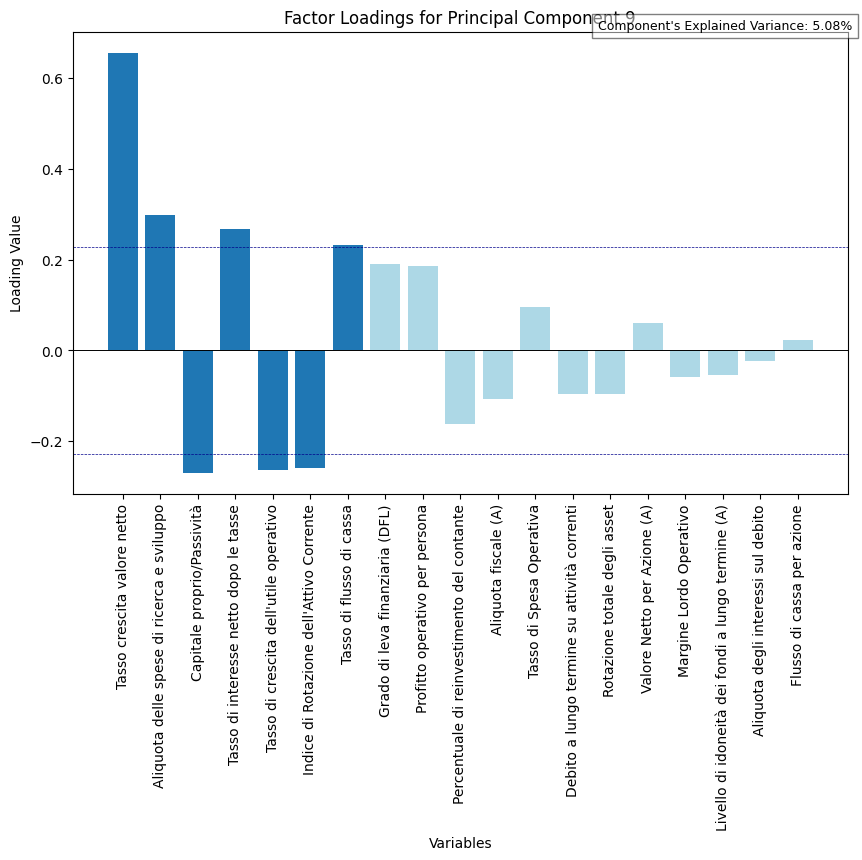

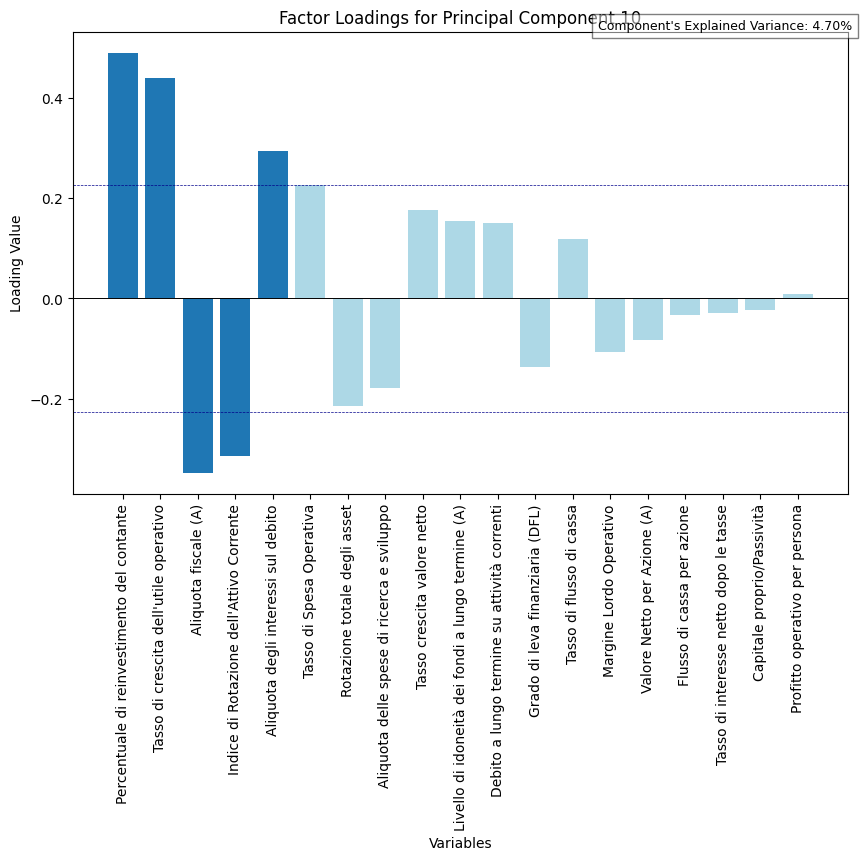

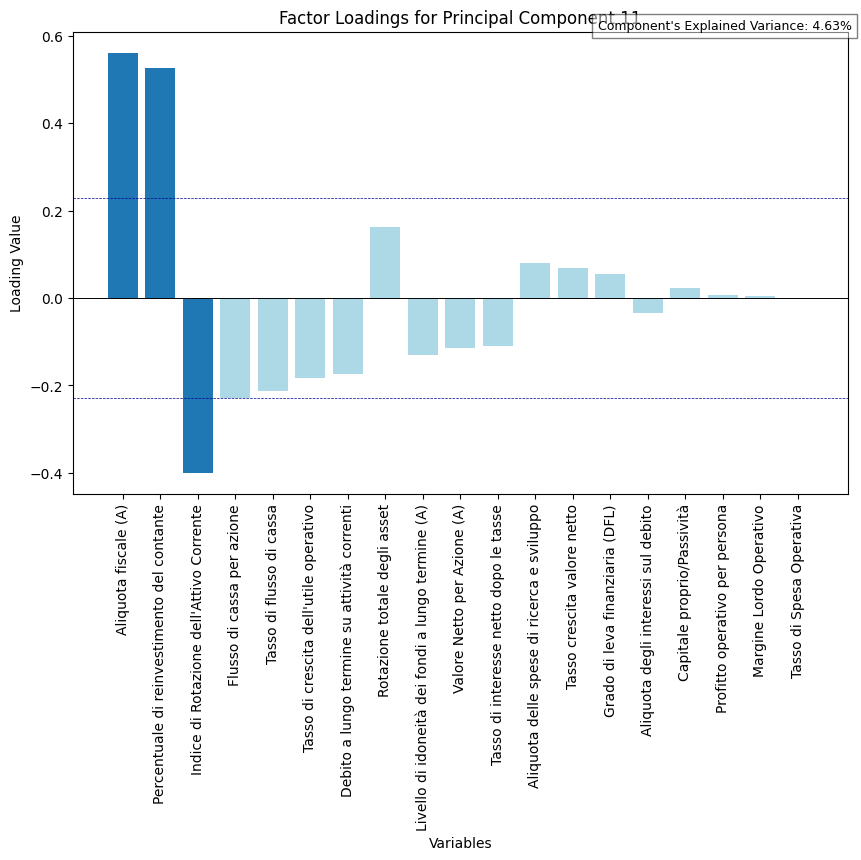

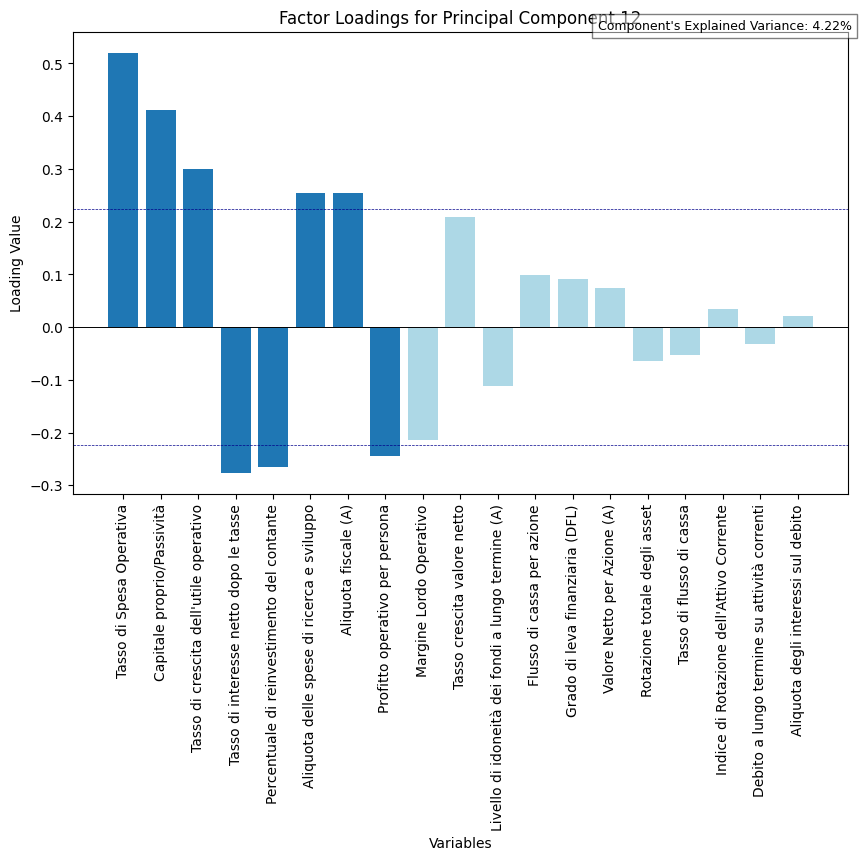

In [51]:
loadings = pca.components_.T

# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    standart_blue = '#1f77b4'
    colors = [standart_blue if abs(loading) >= std_loading else 'lightblue' for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color='darkblue', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)

    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color='darkblue', linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    # plt.tight_layout()
    plt.show()

# Random forest

In [52]:
# Model definition
model = DecisionTreeClassifier(random_state=42)


# Model training
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
# Previsione sui dati di test
y_pred = model.predict(X_test)


# Calcolo della precisione
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


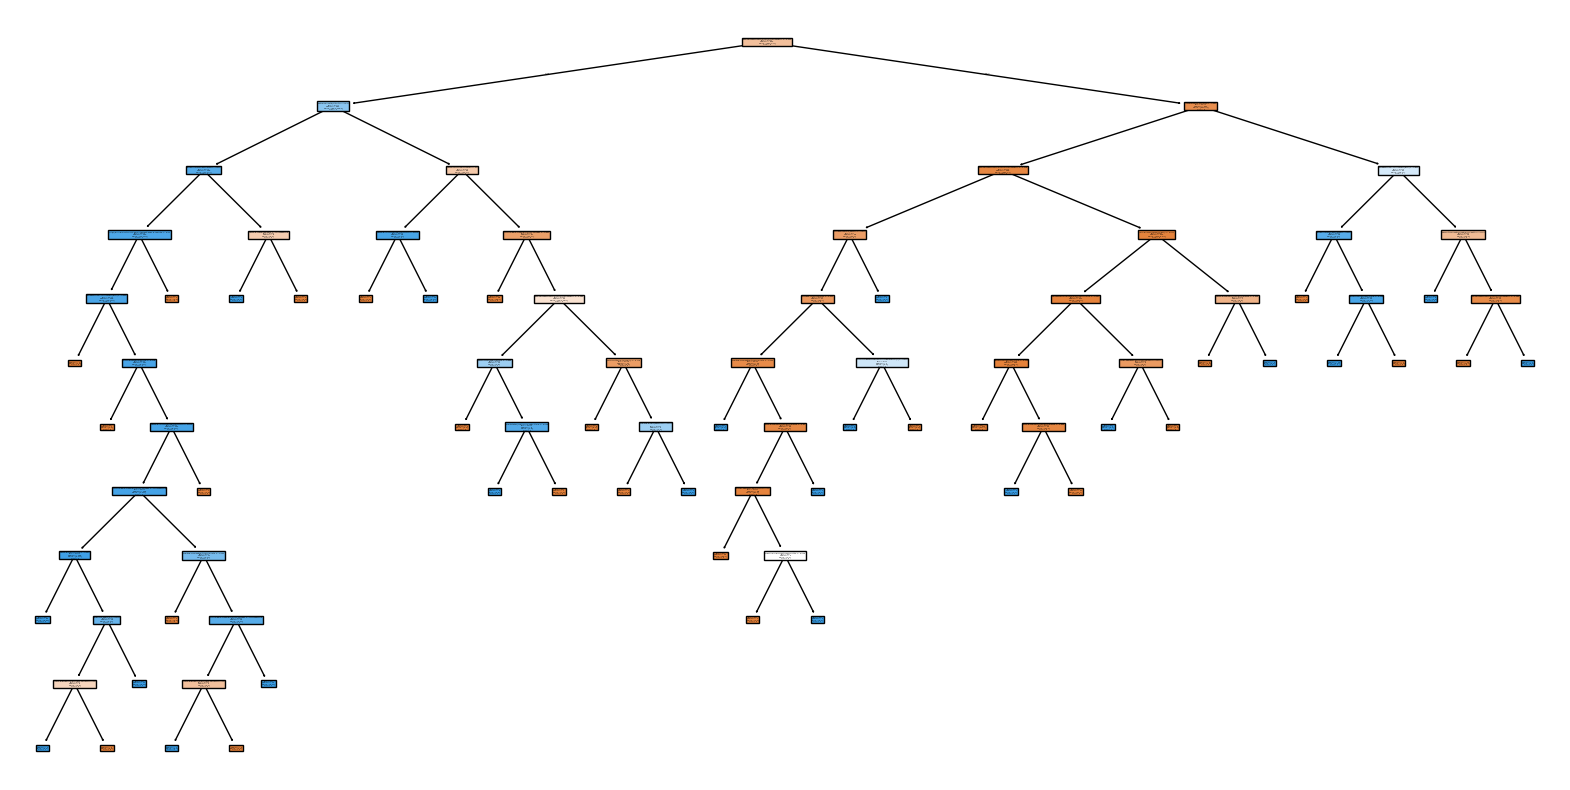

In [54]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=list(X_train.columns), class_names=["0","1"], filled=True)
plt.show()

#### Pruning

Accuracy after pruning: 0.81


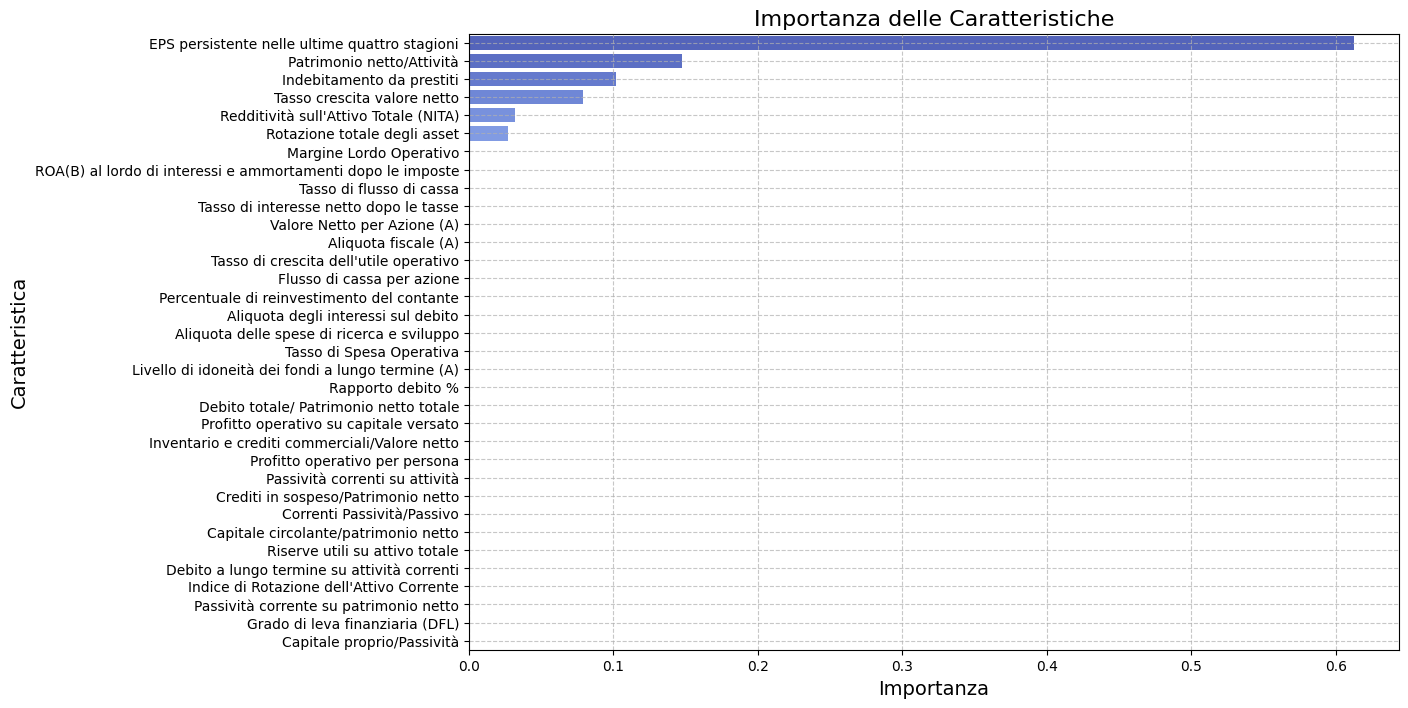

In [57]:
# Model creation with pruning
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Model training
model_pruned.fit(X_train, y_train)

# Model evaluation
y_pred_pruned = model_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy after pruning: {accuracy_pruned:.2f}')

# Feature importance
importances = model_pruned.feature_importances_
feature_importance_df = pd.DataFrame({'FeaturX_train.columnse': , 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Pre Prunung

In [64]:
# Model with pre-pruning
model_pre_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
model_pre_pruned.fit(X_train, y_train)


# Model evaluation
y_pred_pre_pruned = model_pre_pruned.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Accuracy with pre-pruning: {accuracy_pre_pruned:.2f}')

Accuracy with pre-pruning: 0.81


### Post Pruning

In [65]:
# Model with post-pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


# Find the best alpha
model_pruned = None
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model_temp.fit(X_train, y_train)
    y_pred_temp = model_temp.predict(X_test)
    accuracy_temp = accuracy_score(y_test, y_pred_temp)
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        model_pruned = model_temp


print(f'Best accuracy after post-pruning: {best_accuracy:.2f}')

Best accuracy after post-pruning: 0.84


# Cross Validation

In [67]:
# Cross validation with cross validation setted to 5
scores = cross_val_score(model, x, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.79850746 0.7761194  0.7761194  0.80597015 0.90298507]
Mean accuracy: 0.81


### CROSS VALIDATION END POST PRUNING

In [68]:
best_model = None
best_score = 0
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = model_temp


print(f'Best cross-validated accuracy: {best_score:.2f}')

Best cross-validated accuracy: 0.85


In [69]:
# Best model training
best_model.fit(X_train, y_train)


# test evaluation
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy on test set: {accuracy_best:.2f}')

Accuracy on test set: 0.81


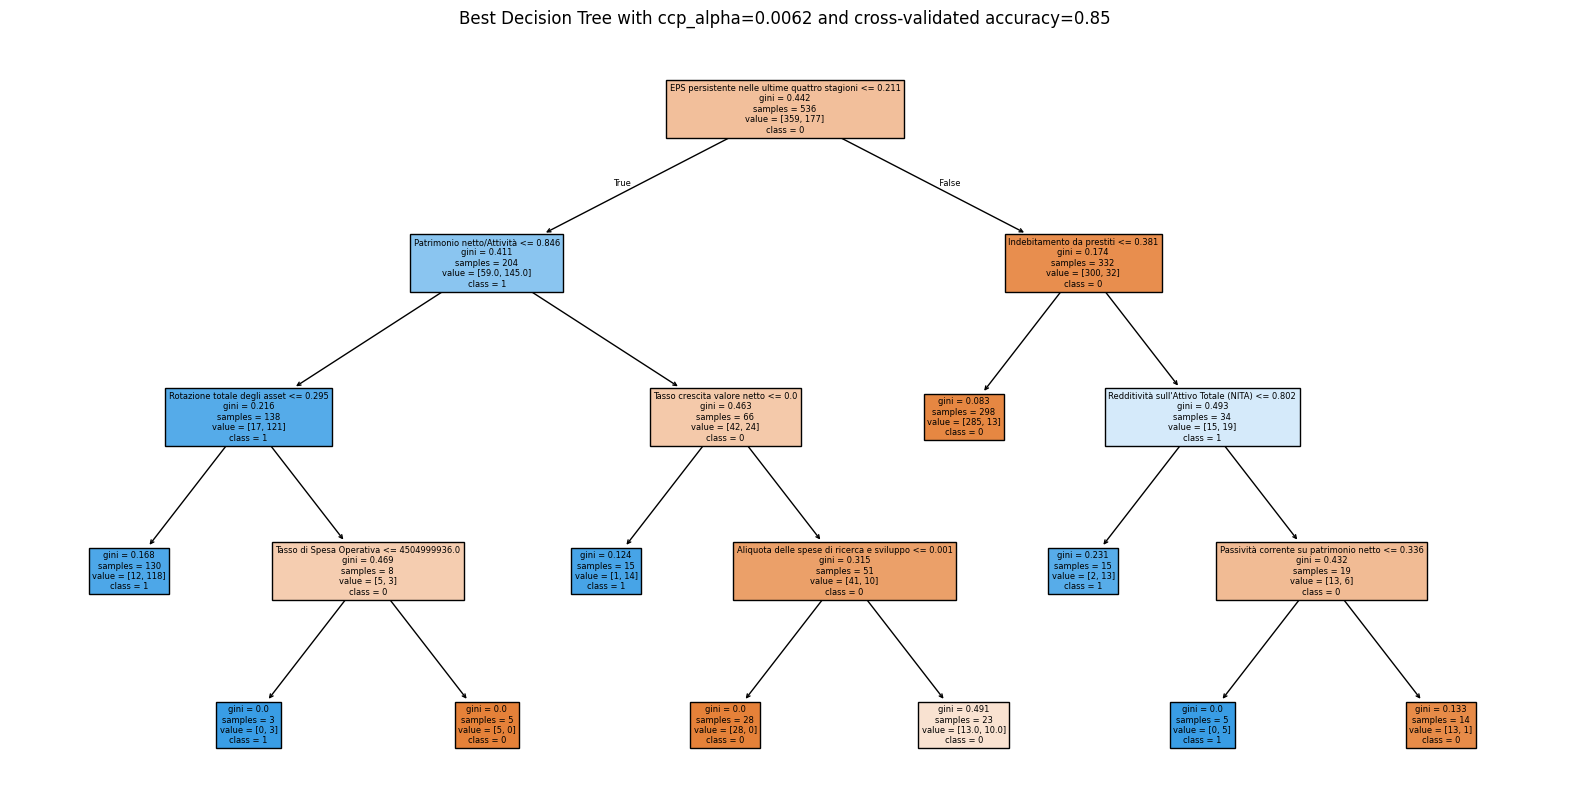

In [71]:
# Best model visualization
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=list(X_train.columns), class_names=["0","1"], filled=True)
plt.title(f'Best Decision Tree with ccp_alpha={best_model.ccp_alpha:.4f} and cross-validated accuracy={best_score:.2f}')
plt.show()